In [1]:
using Gadfly
using Colors

    +(AbstractArray, DataArrays.DataArray) at /Users/mira/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/mira/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /Users/mira/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /Users/mira/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


In [2]:
base03=parse(Colorant,"#002b36");
base02=parse(Colorant,"#073642");
base01=parse(Colorant,"#586e75");
base00=parse(Colorant,"#657b83");
base0=parse(Colorant,"#839496");
base1=parse(Colorant,"#839496");
base2=parse(Colorant,"#eee8d5");
base3=parse(Colorant,"#fdf6e3");

yellow=parse(Colorant,"#b58900");
orange=parse(Colorant,"#cb4b16");
red=parse(Colorant,"#dc322f");
magenta=parse(Colorant,"#d33682");
violet=parse(Colorant,"#6c71c4");
blue=parse(Colorant,"#268bd2");
cyan=parse(Colorant,"#3aa198");
green=parse(Colorant,"#859900");
sc=Scale.ContinuousColorScale(Scale.lab_gradient(red,orange,yellow,base00,cyan,blue,magenta));

In [3]:
function MakeHexagon(Nx::Int)
      Npara=Nx^2;
      N=Npara*3;

      unit=transpose([cos(pi/6),sin(pi/6)])
      a=transpose([2*cos(π/6),0]);
      b=[cos(π/6),1+sin(π/6)];
      bM=transpose(repeat(b,outer=[1,Nx]))
      rotmat=[[cos(2*π/3) -sin(2*π/3)]
            [sin(2*π/3) cos(2*π/3)]]


      Xb=Array{Float64}(N,2);
      Xw=Array{Float64}(N,2);

      ## Creating the positions in the first parallelogram
      for i in 1:Nx
        Xb[i,:]=(i-1)*a;
        Xw[i,:]=unit+(i-1)*a;
      end

      for j in 2:Nx
        Xb[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xb[1:Nx,:]+(j-1)*bM;
        Xw[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xw[1:Nx,:]+(j-1)*bM;
      end

      subt=Xb[Npara,2]+1
      Xb[1:Npara,1]=Xb[1:Npara,1]-(Nx-1)*b[1];
      Xw[1:Npara,1]=Xw[1:Npara,1]-(Nx-1)*b[1];
      Xb[1:Npara,2]=Xb[1:Npara,2]-subt;
      Xw[1:Npara,2]=Xw[1:Npara,2]-subt;

      Xb[Npara+(1:Npara),1]=rotmat[1,1]*Xb[1:Npara,1]+rotmat[1,2]*Xb[1:Npara,2];
      Xw[Npara+(1:Npara),1]=rotmat[1,1]*Xw[1:Npara,1]+rotmat[1,2]*Xw[1:Npara,2];
      Xb[Npara+(1:Npara),2]=rotmat[2,1]*Xb[1:Npara,1]+rotmat[2,2]*Xb[1:Npara,2];
      Xw[Npara+(1:Npara),2]=rotmat[2,1]*Xw[1:Npara,1]+rotmat[2,2]*Xw[1:Npara,2];

      Xb[2*Npara+(1:Npara),1]=rotmat[1,1]*Xb[Npara+(1:Npara),1] +rotmat[1,2]*Xb[Npara+(1:Npara),2];
      Xw[2*Npara+(1:Npara),1]=rotmat[1,1]*Xw[Npara+(1:Npara),1] +rotmat[1,2]*Xw[Npara+(1:Npara),2];
      Xb[2*Npara+(1:Npara),2]=rotmat[2,1]*Xb[Npara+(1:Npara),1] +rotmat[2,2]*Xb[Npara+(1:Npara),2];
      Xw[2*Npara+(1:Npara),2]=rotmat[2,1]*Xw[Npara+(1:Npara),1] +rotmat[2,2]*Xw[Npara+(1:Npara),2];

      vb=sortperm(Xb[:,1]+Npara*Xb[:,2])
      vw=sortperm(Xw[:,1]+Npara*Xw[:,2])
      Xb=Xb[vb,:];
      Xw=Xw[vw,:];

  return Xb, Xw
end

function MakeBonds(Nx::Int,Xb::Array{Float64,2},Xw::Array{Float64,2})
  Npara=Nx^2;
  N=Npara*3;

  nrowb=[collect(Nx:(2*Nx));collect((2*Nx-1):-1:(Nx+1))]
  nroww=flipdim(nrowb,1)

  i0b=ones(nrowb)
  i0w=ones(nroww)
  for i in 2:length(nrowb)
      i0b[i]=i0b[i-1]+nrowb[i-1]
      i0w[i]=i0w[i-1]+nroww[i-1]
  end
  push!(i0b,N+1);
  push!(i0w,N+1);

  offsetb=zeros(N+1)
  offsetw=zeros(N+1)
  for i in 1:Nx
      offsetb[i0b[i]:i0b[i+1]]=i-1
      offsetb[i0b[i+Nx]:i0b[i+1+Nx]]=Nx-i
      offsetw[i0w[i]:i0w[i+1]]=i-1
      offsetw[i0w[i+Nx]:i0w[i+1+Nx]]=Nx-i
  end

  Bondsw=Array{Int64}(N,3);
  Bondsb=Array{Int64}(N,3);
  for i in 1:N
      Bondsb[i,2]=i+offsetb[i];
      Bondsw[i,2]=i-offsetw[i];
      Bondsb[i,1]=i+1+offsetb[i];
      Bondsw[i,1]=i-1-offsetw[i];
      Bondsb[i,3]=i-Nx;
      Bondsw[i,3]=i+Nx;
  end

  boundaryb=ones(Int64,N,3);
  boundaryw=ones(Int64,N,3);
  i=1
  while isapprox(Xb[1,2],Xb[i,2])
      Bondsb[i,3]=N-Nx+i
      boundaryb[i,3]=0
      Bondsw[N-Nx+i,3]=i
      boundaryw[N-Nx+i,3]=0
      #println(N-Nx+i,' ',i)
      i+=1
  end

  Bondsw[i0w[1:Nx],1]=i0b[Nx+1+(1:Nx)]-1;
  boundaryw[i0w[1:Nx],1]=0
  Bondsb[i0b[Nx+1+(1:Nx)]-1,1]=i0w[1:Nx];
  boundaryb[i0b[Nx+1+(1:Nx)]-1,1]=0

  Bondsw[i0w[1+(1:Nx)]-1,2]=i0b[Nx+(1:Nx)];
  boundaryw[i0w[1+(1:Nx)]-1,2]=0
  Bondsb[i0b[Nx+(1:Nx)],2]=i0w[1+(1:Nx)]-1;
  boundaryb[i0b[Nx+(1:Nx)],2]=0

  return Bondsb, Bondsw, boundaryb, boundaryw
end

MakeBonds (generic function with 1 method)

In [4]:
nx=1

1

In [5]:
Xb, Xw= MakeHexagon(nx)
Bondsb, Bondsw, boundaryb, boundaryw=MakeBonds(nx,Xb,Xw);

In [6]:
n=3*nx^2
nstates=2^n;
psi=collect(0:(nstates-1));
for ii in 1:nstates
    println(ii,' ',bin(psi[ii],3))
end

1 000
2 001
3 010
4 011
5 100
6 101
7 110
8 111


In [54]:
Bondsb[1,1]

2

In [7]:
M=zeros(Int8,nstates^2,nstates^2);
for ii in 1:nstates
    for jj in 1:nstates
        
        for kk in 1:n
            
            if ((psi[ii])&2^(kk-1)) * ((psi[jj])&2^(Bondsb[kk,3]-1))!=0
                M[(ii-1)*nstates+jj,(ii-1)*nstates+jj]+=1
            else
                M[(ii-1)*nstates+jj,(ii-1)*nstates+jj]-=1
            end
        
        end
    end
end

In [8]:
for kk in 0:2
    bb=Bondsb[kk+1,1]-1
    #println("New Site\t",kk+1,'\t',bb+1)
    for ii in 1:nstates
        if ( psi[ii]&(2^kk ) )==0
            neiw=psi[ii]+2^kk 
        else
            neiw=psi[ii]-2^kk
        end
        #println(bin(psi[ii],3),' ',kk,' ',bin(neiw,3))
        
        for jj in 1:nstates
            if ( psi[jj]&(2^bb) ) ==0
                neib=psi[jj]+2^bb
            else
                neib=psi[jj]-2^bb
            end
            #println(psi[ii],' ',neiw,'\t',psi[jj],' ',neib)
            #println(bin(psi[ii],3),' ',bin(neiw,3),
            #'\t',bin(psi[jj],3),' ',bin(neib,3))
            M[(ii-1)*nstates+jj,neiw*nstates+neib+1]+=1
        end    
    end
end

In [9]:
zed=true
for kk in 0:2
    bb=Bondsb[kk+1,2]-1
    #println("New Site\t",kk,'\t',bb+1)
    for ii in 1:nstates
        if ( psi[ii]&(2^kk) )==0
            neiw=psi[ii]+2^kk 
            zed=true
        else
            neiw=psi[ii]-2^kk
            zed=false
        end
        #println(bin(psi[ii],3),' ',kk,' ',bin(neiw,3))
        
        for jj in 1:nstates
            
            if ( psi[jj]&(2^bb) ) ==0
                neib=psi[jj]+2^bb
                if zed==true
                    M[(ii-1)*nstates+jj,neiw*nstates+neib+1]+=1
                else
                    M[(ii-1)*nstates+jj,neiw*nstates+neib+1]+=-1
                end
            else
                neib=psi[jj]-2^bb
                if zed==false
                    M[(ii-1)*nstates+jj,neiw*nstates+neib+1]+=1
                else
                    M[(ii-1)*nstates+jj,neiw*nstates+neib+1]+=-1
                end
            end
            #println(bin(psi[ii],3),' ',bin(neiw,3),
            #'\t',bin(psi[jj],3),' ',bin(neib,3))
            
        end    
    end
end

In [11]:
F=eigfact(M);

In [20]:
sx=[[0 1]
    [1 0]]
sy=[[0 -im]
    [im 0]]
sz=[[1 0]
    [0 -1]]
typeof(sy)

Array{Complex{Int64},2}

In [58]:
Wp=zeros(Complex{Int64},12,12)
Wp[1:2,1:2]=sz #one of black
Wp[3:4,3:4]=sx #one of white
Wp[5:6,5:6]=sy #two of black
Wp[7:8,7:8]=sy # two of white
Wp[9:10,9:10]=sx #three of black
Wp[11:12,11:12]=sz; #three of white

2x2 Array{Int64,2}:
 1   0
 0  -1

In [ ]:
println(sort(diag(M)))

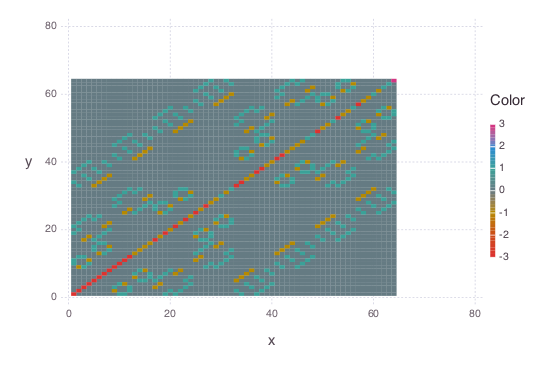

In [73]:
t=collect(1:nstates^2)
x=repmat(t,1,nstates^2)
y=repmat(transpose(t),nstates^2,1)
plot(x=x,y=y,color=M,Geom.rectbin,sc)

In [ ]:
for ii in 1:nstates^2
    j=mod(ii-1,nstates)
    i=Int(floor(ii/nstates))
    if M[ii,1]!=0
        println(ii,'\t',i,' ',bin(i,3),'\t',j,' ',bin(j,3),'\t',M[ii,1])
    end
end

In [ ]:
plot(y=F[:values])

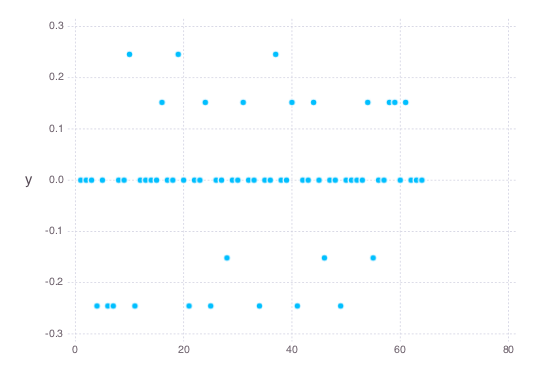

In [84]:
plot(y=F[:vectors][:,1])

In [ ]:
for ii in 1:nstates^2
    #if abs(F[:vectors][1,ii])>1e-10
        j=mod(ii-1,nstates)
        i=Int(floor(ii/nstates))
        println(ii,'\t',i,' ',bin(i,3),'\t',j,' ',bin(j,3),'\t',F[:vectors][1,ii])
    #end
end

In [ ]:
for ii in 1:nstates^2
    if abs(F[:vectors][ii,2])>1e-10
        j=mod(ii-1,nstates)
        i=Int(floor(ii/nstates))
        println(ii,'\t',i,' ',bin(i,3),'\t',j,' ',bin(j,3),'\t',F[:vectors][ii,2])
    end
end

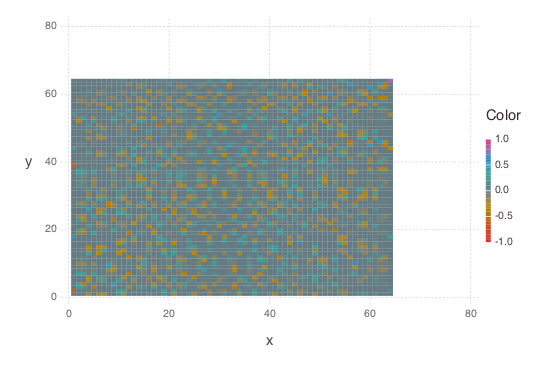

In [74]:
plot(x=x,y=y,color=F[:vectors],Geom.rectbin,sc)

In [30]:
Ss=zeros(Int64,12,nstates^2)
for ii in 1:nstates
    for jj in 1:nstates
        Ss[1,(ii-1)*nstates+jj]=1&ii/1
        Ss[2,(ii-1)*nstates+jj]=1-1&ii/1
        Ss[5,(ii-1)*nstates+jj]=2&ii/2
        Ss[6,(ii-1)*nstates+jj]=1-2&ii/2
        Ss[9,(ii-1)*nstates+jj]=4&ii/4
        Ss[10,(ii-1)*nstates+jj]=1-4&ii/4
        
        Ss[3,(ii-1)*nstates+jj]=1&jj/1
        Ss[4,(ii-1)*nstates+jj]=1-1&jj/1
        Ss[7,(ii-1)*nstates+jj]=2&jj/2
        Ss[8,(ii-1)*nstates+jj]=1-2&jj/2
        Ss[11,(ii-1)*nstates+jj]=4&jj/4
        Ss[12,(ii-1)*nstates+jj]=1-4&jj/4
    end
end
    

In [83]:
Ss[1:2:12,1:12]

6x12 Array{Int64,2}:
 1  1  1  1  1  1  1  1  0  0  0  0
 1  0  1  0  1  0  1  0  1  0  1  0
 0  0  0  0  0  0  0  0  1  1  1  1
 0  1  1  0  0  1  1  0  0  1  1  0
 0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  1  1  1  0  0  0  0  1

In [97]:
gstate=zeros(Float64,12)
for ii in 1:nstates^2
    gstate+=F[:vectors][ii,1]*Ss[:,ii]
end
for ii in 1:2:11
    normt=sqrt(gstate[ii]^2+gstate[ii+1]^2)
    gstate[ii]=gstate[ii]/normt
    gstate[ii+1]=gstate[ii+1]/normt   
end

In [98]:
statet=zeros(Float64,12)
for ii in 1:nstates^2
    statet+=F[:vectors][ii,end]*Ss[:,ii]
end
for ii in 1:2:11
    normt=sqrt(statet[ii]^2+statet[ii+1]^2)
    statet[ii]=statet[ii]/normt
    statet[ii+1]=statet[ii+1]/normt   
end

In [130]:
wvalues=zeros(Complex{Float64},nstates^2)
for jj in 1:nstates^2
    state=zeros(Float64,12)
    for ii in 1:nstates^2
        state+=F[:vectors][ii,jj]*Ss[:,ii]
    end
    for ii in 1:2:11
        normt=sqrt(state[ii]^2+state[ii+1]^2)
        state[ii]=state[ii]/normt
        state[ii+1]=state[ii+1]/normt   
    end
    wvalues[jj]=(transpose(state)*Wp*state)[1]
end

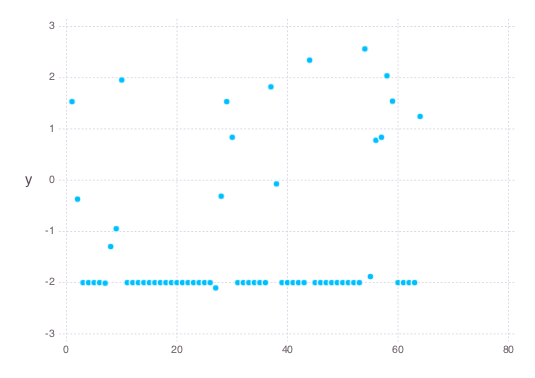

In [133]:
plot(y=real(wvalues))

In [127]:
(transpose(gstate)*Wp*gstate)[1]

1.53287679745638 + 0.0im

In [101]:
transpose(statet)*Wp*statet

1-element Array{Complex{Float64},1}:
 1.24333+0.0im